In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

db = pd.read_csv("gender_submission.csv")
print("Database raw shape (%s,%s)" % np.shape(db))

Database raw shape (418,2)


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()
# test.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train['Title'] = train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

train.Title = train.Title.map(normalized_titles)
test.Title = train.Title.map(normalized_titles)

train.Title.replace(['Mr', 'Miss', 'Mrs', 'Master', 'Officer', 'Royalty'], [1, 2, 3, 4, 5, 6], inplace=True)
test.Title.replace(['Mr', 'Miss', 'Mrs', 'Master', 'Officer', 'Royalty'], [1, 2, 3, 4, 5, 6], inplace=True)


In [6]:
# Drop the name feature
train = train.drop('Name', 1)
test = test.drop('Name', 1)
# Encoding the features
train.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
train.Sex.replace(['male', 'female'], [1, 2], inplace=True)
test.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
test.Sex.replace(['male', 'female'], [1, 2], inplace=True)

# Temporary drop of some columns
train = train.drop('Ticket', 1)
train = train.drop('Cabin', 1)
test = test.drop('Ticket', 1)
test = test.drop('Cabin', 1)

#Fill NaN values of Age with the mean Age
train['Age'] = train['Age'].fillna(train['Age'].sum()/len(train))
test['Age'] = test['Age'].fillna(test['Age'].sum()/len(test))
#Drop other raw where there is a NaN value
train= train.dropna(how='any',axis=0)  
test = test.fillna(0)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    float64
 9   Title        889 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 76.4 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_la

In [7]:
Data_train = train.values
Data_test = test.values

# m = number of input samples
m_train = len(Data_train)
m_test = len(Data_test)
# prediction for training
Ytrain = Data_train[:m_train,1]
# features for training
Xtrain = Data_train[:m_train,2:]
# features for testing
Xtest = Data_test[:m_test,1:]

parameters = {'C': [1, 10, 50, 100,200,300, 1000],'gamma':[0.0001,0.001,0.01,0.1,1.]}
#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
clf = GridSearchCV(rbf_SVM,parameters,cv=5)
clf.fit(Xtrain,Ytrain)

print ('\n RESULTS FOR rbf KERNEL \n')

best_param = clf.best_params_
value_best_param_rbf_gammma = best_param['gamma']
value_best_param_rbf_c = best_param['C']
estim_best = clf.best_estimator_
print("Best Estimator: ", estim_best)
print("Best parameters set found:",best_param)

#get training and test error for the best SVM model from CV
best_SVM = SVC(C = value_best_param_rbf_c, gamma = value_best_param_rbf_gammma, kernel='rbf')

best_SVM.fit(Xtrain,Ytrain)

training_error = 1. - best_SVM.score(Xtrain,Ytrain)
print("Training error: ", training_error)

Ytest_predicted = best_SVM.predict(Xtest)

print("Accuracy =",1-training_error);


 RESULTS FOR rbf KERNEL 

Best Estimator:  SVC(C=1000, gamma=0.0001)
Best parameters set found: {'C': 1000, 'gamma': 0.0001}
Training error:  0.17210348706411693
Accuracy = 0.8278965129358831


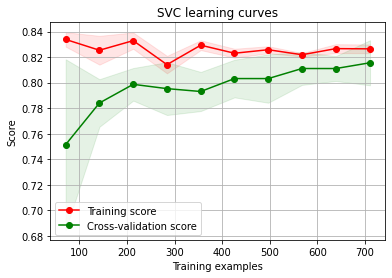

In [8]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes= np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(estim_best,"SVC learning curves",Xtrain,Ytrain,cv=5)
plt.show()